In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
train_df = pd.read_csv("/Users/meetpatel/Desktop/project_6/rossmann-store-sales/train.csv")
test_df =  pd.read_csv("/Users/meetpatel/Desktop/project_6/rossmann-store-sales/test.csv")

/var/folders/89/88_l7y257kd5mnk20gl6rm5m0000gn/T/ipykernel_14590/1179172313.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("/Users/meetpatel/Desktop/project_6/rossmann-store-sales/train.csv")


In [4]:
df = pd.read_csv("/Users/meetpatel/Desktop/project_6/rossmann-store-sales.csv",index_col=0)
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,...,Month,Day,Weak of year,Quarter,Isweekend,BeginningOfMonth,MidOfMonth,EndOfMonth,Predicted_Sales,Loss
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,NaN,...,7,31,31,3,0,0,1,1,5549.96,286.96
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,1,NaN,...,7,31,31,3,0,0,1,1,6308.33,244.33
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,1,NaN,...,7,31,31,3,0,0,1,1,8452.30,138.30
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,NaN,...,7,31,31,3,0,0,1,1,12404.01,-1590.99
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,NaN,...,7,31,31,3,0,0,1,1,5646.14,824.14


In [5]:
sales_data = df[['Date','Sales']]
sales_data= pd.DataFrame(sales_data)
sales_data['Date']=pd.to_datetime(sales_data['Date'])
sales_data


,Date,Sales
0,2015-07-31,5263.0
1,2015-07-31,6064.0
2,2015-07-31,8314.0
3,2015-07-31,13995.0
4,2015-07-31,4822.0
...,...,...
846632,2013-06-02,0.0
846633,2013-06-02,0.0
846634,2013-06-02,0.0
846635,2013-06-02,0.0


In [6]:
df1 = sales_data.set_index('Date')

monthly_sales = df1.resample('M').mean()
monthly_sales.head()

,Sales
Date,
2013-06-30,5555.228763
2013-07-31,6042.062260
2013-08-31,5729.574049
2013-09-30,5322.988430
2013-10-31,5429.258788


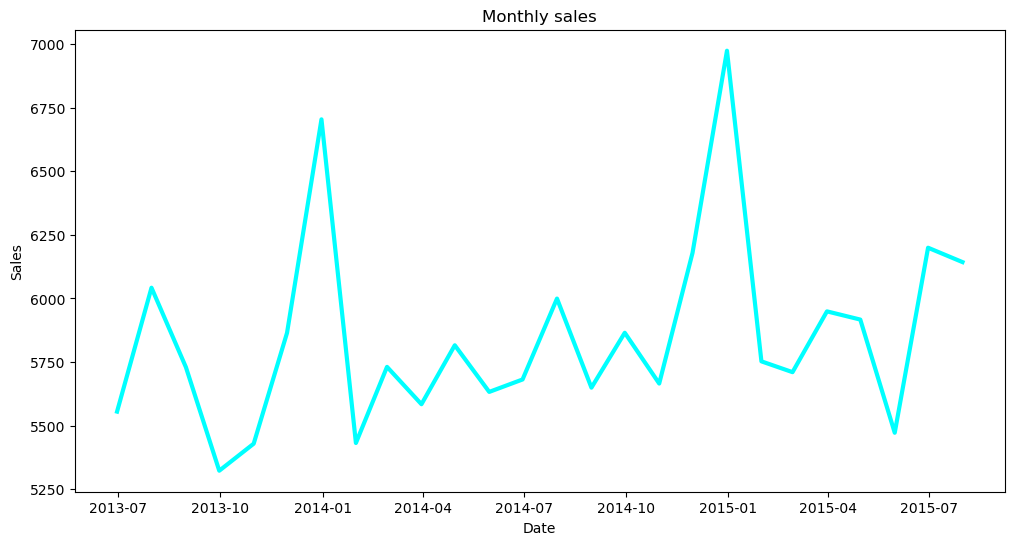

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Sales'], linewidth=3,c='cyan')
plt.title("Monthly sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [8]:
def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(monthly_sales['Sales'])

ADF Statistic: -4.679307515652914
p-value: 9.201632344361474e-05
Stationary


In [9]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [10]:
df_a = df = pd.read_csv("/Users/meetpatel/Desktop/project_6/rossmann-store-sales.csv", parse_dates=['Date'], index_col=0)
df_a.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,...,Month,Day,Weak of year,Quarter,Isweekend,BeginningOfMonth,MidOfMonth,EndOfMonth,Predicted_Sales,Loss
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,NaN,...,7,31,31,3,0,0,1,1,5549.96,286.96
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,1,NaN,...,7,31,31,3,0,0,1,1,6308.33,244.33
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,1,NaN,...,7,31,31,3,0,0,1,1,8452.30,138.30
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,NaN,...,7,31,31,3,0,0,1,1,12404.01,-1590.99
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,NaN,...,7,31,31,3,0,0,1,1,5646.14,824.14


In [24]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [25]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Sales'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:               846637
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -7864749.538
Date:                Thu, 20 Mar 2025   AIC                       15729505.076
Time:                        18:56:51   BIC                       15729540.023
Sample:                             0   HQIC                      15729514.758
                             - 846637                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0173      0.001     18.158      0.000       0.015       0.019
ma.L1         -0.9553      0.000  -3347.210      0.000      -0.956      -0.955
sigma2      6.858e+06   4513.077   1519.622      0.0

In [12]:
forecast = model_fit.forecast(steps=180)

In [16]:
model = SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,7))
model_fit = model.fit()
print(model_fit.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.53113D+00    |proj g|=  8.96684D-02


 This problem is unconstrained.



At iterate    5    f=  9.44523D+00    |proj g|=  2.03653D-02

At iterate   10    f=  9.43438D+00    |proj g|=  5.25298D-03

At iterate   15    f=  9.43300D+00    |proj g|=  8.06258D-04

At iterate   20    f=  9.43196D+00    |proj g|=  3.89837D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     44      1     0     0   4.147D-02   9.393D+00
  F =   9.3927925727483306     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                     
Dep. Variable:                             Sales   No. Observations:               846637
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood            -7952285.725
Date:                           Thu, 20 Mar 2025   AIC                       15904581.451
Time:                                   17:08:34   BIC         

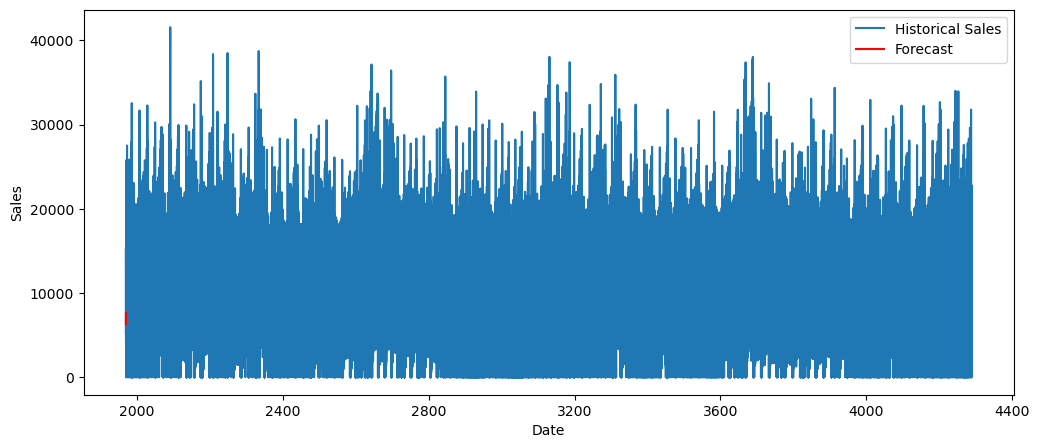

In [26]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Sales'], label="Historical Sales")
plt.plot(pd.date_range(df.index[-1], periods=180, freq='D'), forecast, label="Forecast", color="red")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [27]:
forecast_steps = 180
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:]
forecast = model_fit.forecast(steps=forecast_steps)

In [28]:
forecast_df = pd.DataFrame({'Date': forecast_index, 'Predicted_Sales': forecast.values})
forecast_df.set_index("Date", inplace=True)

In [34]:
forecast_df

,Predicted_Sales
Date,
1970-01-02 00:00:00.000846636,3301.794669
1970-01-03 00:00:00.000846636,3358.952531
1970-01-04 00:00:00.000846636,3359.942000
1970-01-05 00:00:00.000846636,3359.959129
1970-01-06 00:00:00.000846636,3359.959425
...,...
1970-06-26 00:00:00.000846636,3359.959430
1970-06-27 00:00:00.000846636,3359.959430
1970-06-28 00:00:00.000846636,3359.959430


In [33]:
forecast_df.to_csv("/Users/meetpatel/Desktop/project_6/forcast_prediction.csv")

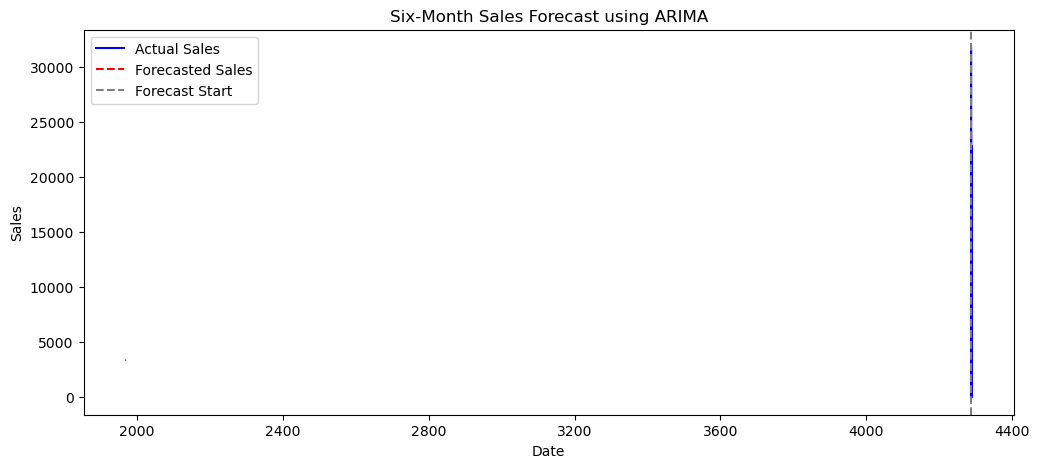

In [35]:
plt.figure(figsize=(12,5))
plt.plot(df['Sales'].iloc[-365:], label="Actual Sales", color='blue')
plt.plot(forecast_df['Predicted_Sales'], label="Forecasted Sales", color='red', linestyle='dashed')
plt.axvline(df.index[-1], color='gray', linestyle='--', label="Forecast Start")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Six-Month Sales Forecast using ARIMA")
plt.legend()
plt.show()

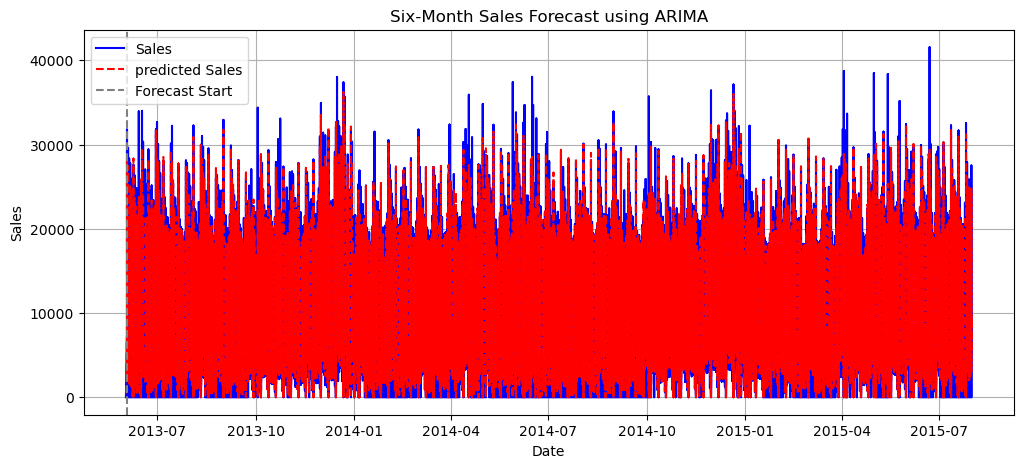

In [37]:
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Sales'], label='Sales', color='blue')
plt.plot(df['Date'], df['Predicted_Sales'], linestyle='dashed', label='predicted Sales', color='red')
plt.axvline(df['Date'].iloc[-180], color='gray', linestyle='dashed', label="Forecast Start")

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Six-Month Sales Forecast using ARIMA")
plt.legend()
plt.grid()